In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [28]:
df = pd.read_csv('data/Soil_data.csv')
df.head()

,siteinfor,country,latitude,longitude,elevation,mat,map,samplingdepth,samplingthickness,sandperc,...,covercrop,covercropgroup,graincrop,graincropgroup,fertilization_c,fertilization_t,conservation_type,controldescription,yield_c,yield_t
0,New York,USA,40.71,-74.01,3.5,NaN,NaN,Not-available,Not-available,NaN,...,White_clover,Legume,Bean/Beet/Corn/Bean,MTT,NaN,NaN,CC,Fallow,NaN,NaN
1,New York,USA,40.71,-74.01,3.5,NaN,NaN,Not-available,Not-available,NaN,...,Vetch,Legume,Bean/Beet/Corn/Bean,MTT,NaN,NaN,CC,Fallow,NaN,NaN
2,New York,USA,40.71,-74.01,3.5,NaN,NaN,Not-available,Not-available,NaN,...,White_mustard,Brassica,Bean/Beet/Corn/Bean,MTT,NaN,NaN,CC,Fallow,4862.0,3990.0
3,New York,USA,40.71,-74.01,3.5,NaN,NaN,Not-available,Not-available,NaN,...,Alfalfa,Legume,Bean/Beet/Corn/Bean,MTT,NaN,NaN,CC,Fallow,NaN,NaN
4,New York,USA,40.71,-74.01,3.5,NaN,NaN,Not-available,Not-available,NaN,...,Ryegrass,Rye,Bean/Beet/Corn/Bean,MTT,NaN,NaN,CC,Fallow,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4457 entries, 0 to 4456
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   siteinfor           4457 non-null   object 
 1   country             4457 non-null   object 
 2   latitude            4457 non-null   float64
 3   longitude           4457 non-null   float64
 4   elevation           4457 non-null   float64
 5   mat                 582 non-null    float64
 6   map                 2070 non-null   float64
 7   samplingdepth       4038 non-null   object 
 8   samplingthickness   3950 non-null   object 
 9   sandperc            2194 non-null   float64
 10  siltperc            2194 non-null   float64
 11  texture             3989 non-null   object 
 12  soilph              2223 non-null   float64
 13  covercrop           4457 non-null   object 
 14  covercropgroup      4457 non-null   object 
 15  graincrop           4457 non-null   object 
 16  grainc

In [29]:
df = df.dropna(subset=[df.columns[-2], df.columns[-1]])
df.shape

(1958, 23)

In [30]:
df = df.drop(['mat','country','fertilization_c','fertilization_t'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1958 entries, 2 to 4456
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   siteinfor           1958 non-null   object 
 1   latitude            1958 non-null   float64
 2   longitude           1958 non-null   float64
 3   elevation           1958 non-null   float64
 4   map                 1124 non-null   float64
 5   samplingdepth       1631 non-null   object 
 6   samplingthickness   1623 non-null   object 
 7   sandperc            1066 non-null   float64
 8   siltperc            1066 non-null   float64
 9   texture             1663 non-null   object 
 10  soilph              1190 non-null   float64
 11  covercrop           1958 non-null   object 
 12  covercropgroup      1958 non-null   object 
 13  graincrop           1958 non-null   object 
 14  graincropgroup      1958 non-null   object 
 15  conservation_type   1958 non-null   object 
 16  controldesc

In [31]:
columns_to_fill = ['map','sandperc','siltperc','soilph']
columns_to_replace = ['samplingdepth', 'samplingthickness']

for columns in columns_to_replace:
    df[columns] = df[columns].replace('Not-available', 'Not_available')

df['texture'] = df['texture'].replace('NotAvailable','Not_available')

for columns in columns_to_fill:
    df[columns] = df[columns].fillna(df[columns].mean())

df['samplingdepth'] = df['samplingdepth'].fillna('Not_available')
df['samplingthickness'] = df['samplingthickness'].fillna('Not_available')
df['texture'] = df['texture'].fillna('Not_available')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1958 entries, 2 to 4456
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   siteinfor           1958 non-null   object 
 1   latitude            1958 non-null   float64
 2   longitude           1958 non-null   float64
 3   elevation           1958 non-null   float64
 4   map                 1958 non-null   float64
 5   samplingdepth       1958 non-null   object 
 6   samplingthickness   1958 non-null   object 
 7   sandperc            1958 non-null   float64
 8   siltperc            1958 non-null   float64
 9   texture             1958 non-null   object 
 10  soilph              1958 non-null   float64
 11  covercrop           1958 non-null   object 
 12  covercropgroup      1958 non-null   object 
 13  graincrop           1958 non-null   object 
 14  graincropgroup      1958 non-null   object 
 15  conservation_type   1958 non-null   object 
 16  controldesc

In [34]:
df.iloc[1, 5]

'Not_available'

In [7]:
columns_to_encode = [5,6,9,11,12,13,14,15,16]

label_encoder = LabelEncoder()

for col_index in columns_to_encode:
    df.iloc[:, col_index] = label_encoder.fit_transform(df.iloc[:, col_index])

In [8]:
df.head()

,siteinfor,latitude,longitude,elevation,map,samplingdepth,samplingthickness,sandperc,siltperc,texture,soilph,covercrop,covercropgroup,graincrop,graincropgroup,conservation_type,controldescription,yield_c,yield_t
2,New York,40.71,-74.01,3.5,1130.818683,26,15,56.905103,20.638837,4,6.039655,219,2,5,9,1,8,4862.0,3990.0
7,New York,40.71,-74.01,3.5,1130.818683,26,15,56.905103,20.638837,4,6.039655,159,16,5,9,1,8,4862.0,5240.0
13,"Lethbridge, AB, Canada",49.69,-112.84,901.0,1130.818683,26,15,37.000000,30.000000,2,6.039655,156,16,15,14,1,8,16400.0,23300.0
14,"Lethbridge, AB, Canada",49.69,-112.84,901.0,1130.818683,26,15,37.000000,30.000000,2,6.039655,19,6,15,14,1,8,16400.0,19800.0
15,"Lethbridge, AB, Canada",49.69,-112.84,901.0,1130.818683,26,15,37.000000,30.000000,2,6.039655,124,6,15,14,1,8,16400.0,19600.0


In [9]:
corr = df.iloc[:,3:].corr(method='pearson')

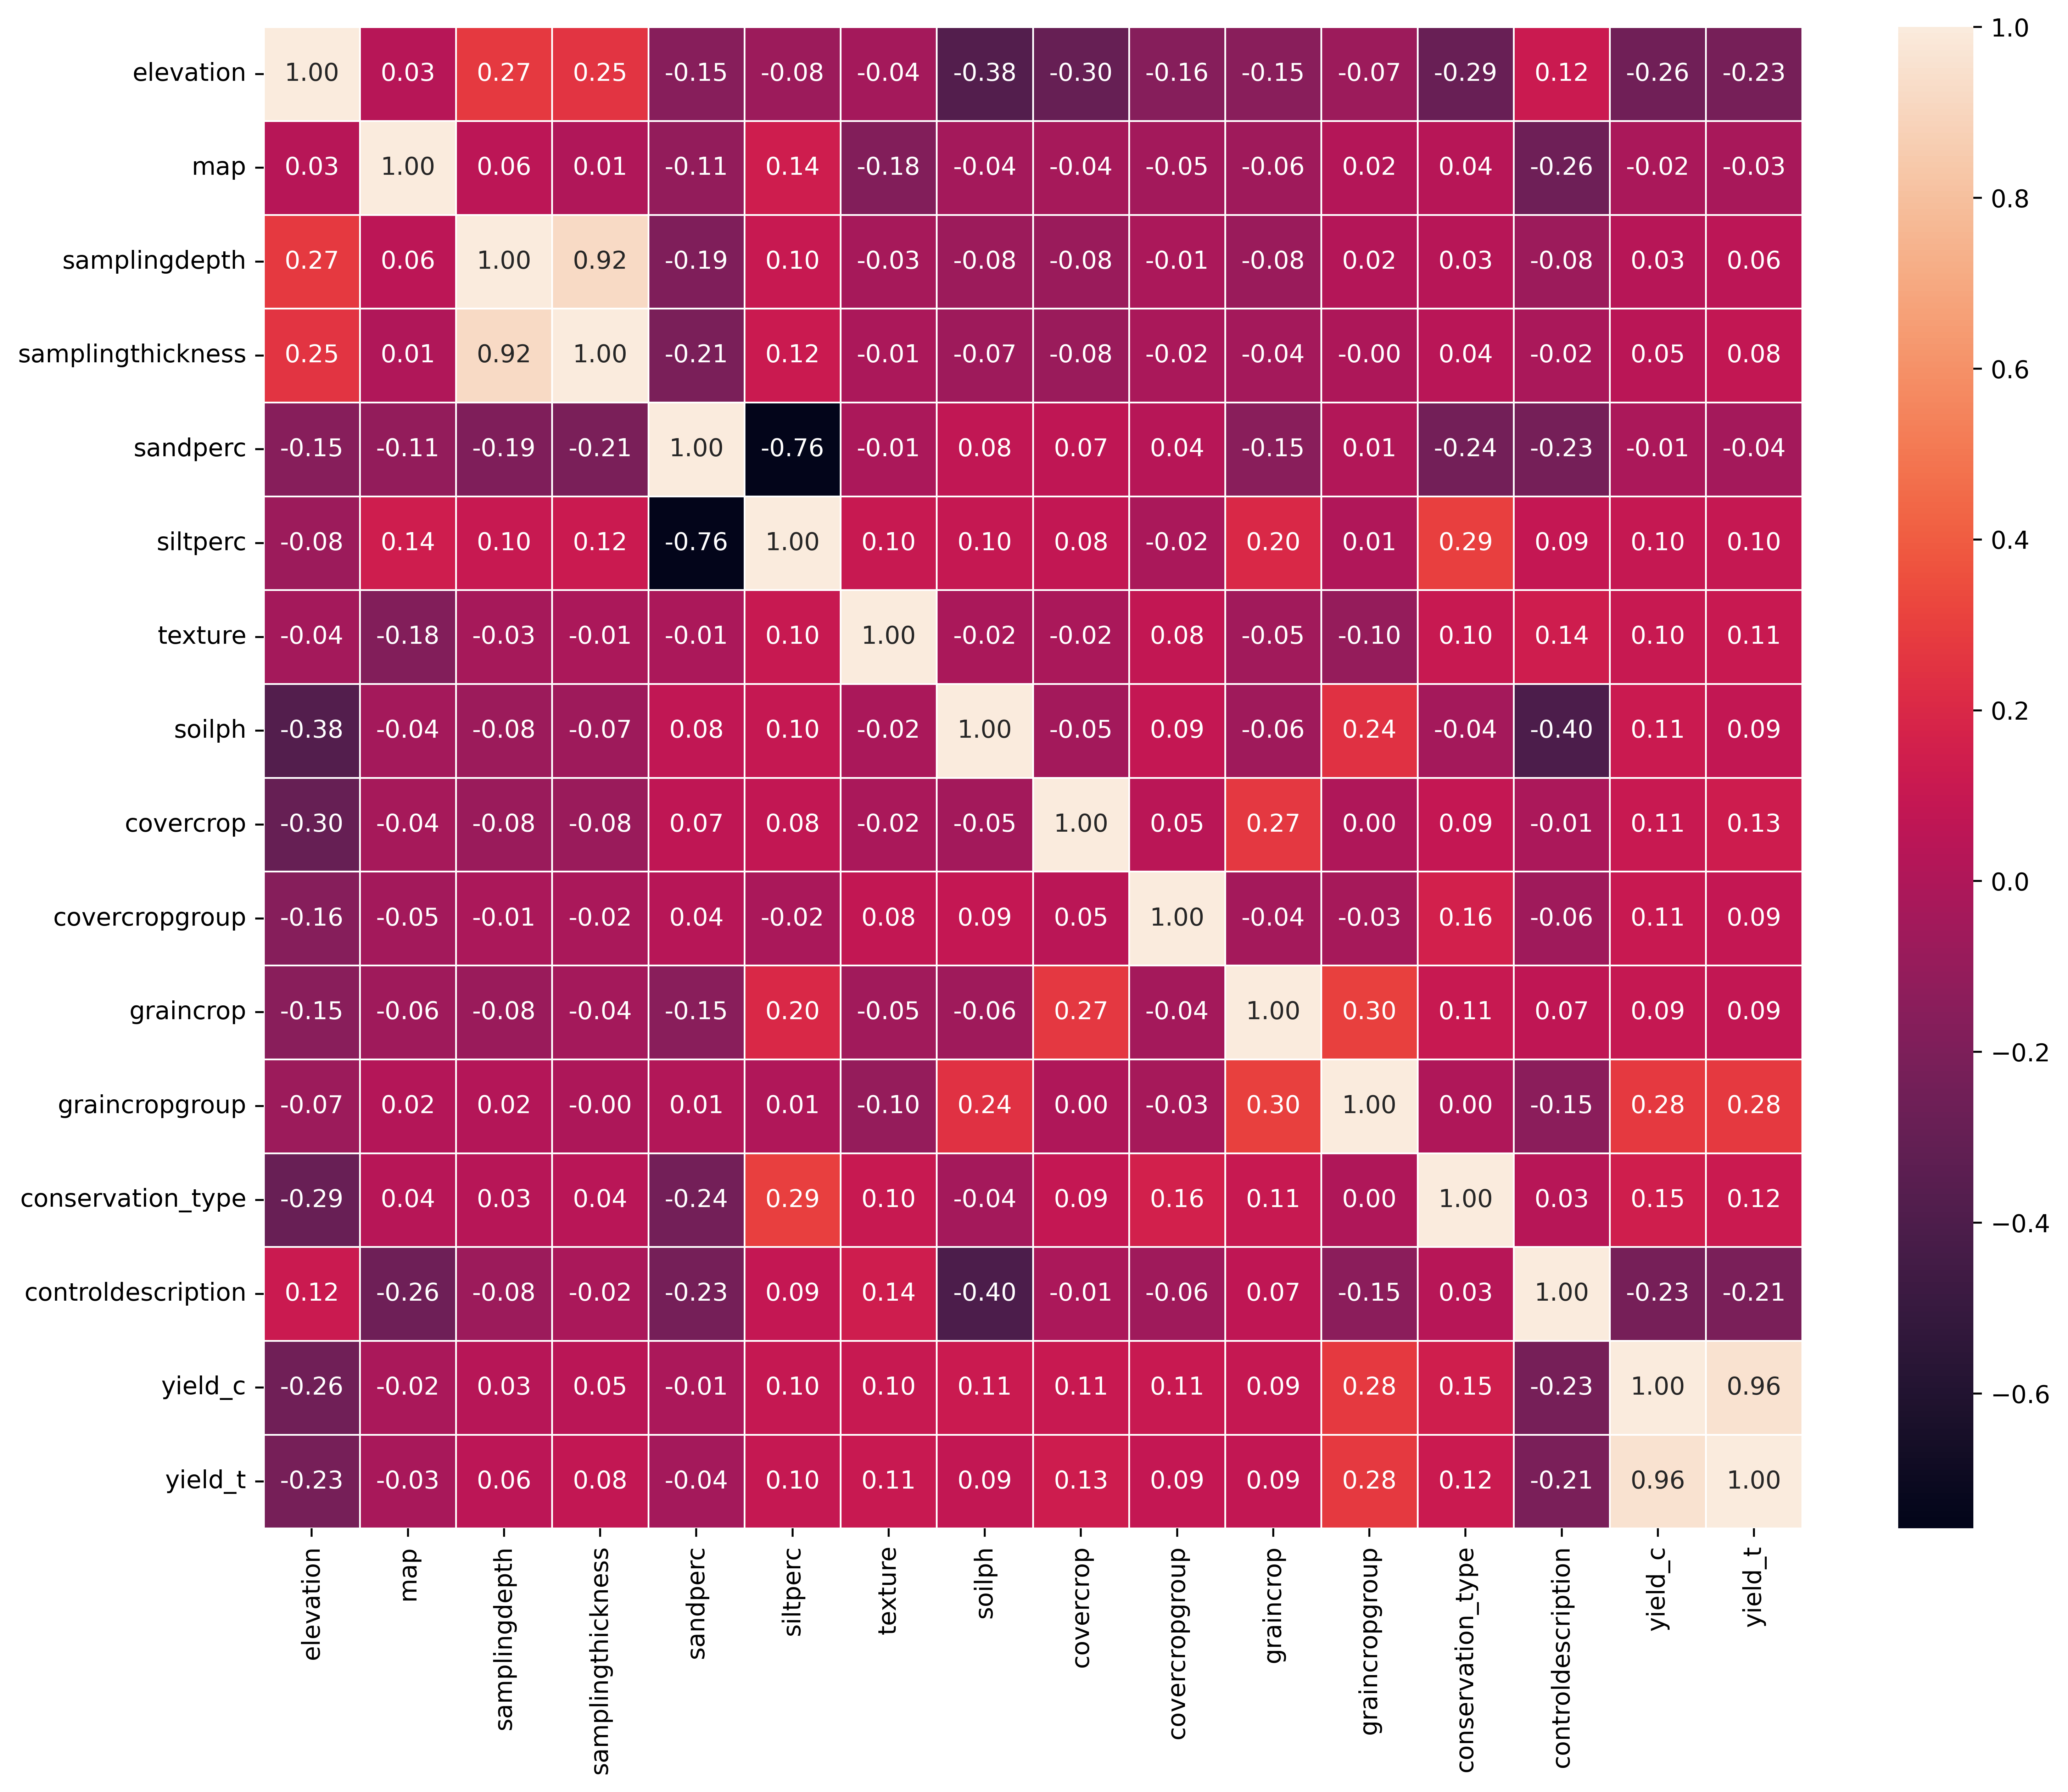

In [10]:
plt.figure(figsize=(14,11), dpi=500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1958 entries, 2 to 4456
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   siteinfor           1958 non-null   object 
 1   latitude            1958 non-null   float64
 2   longitude           1958 non-null   float64
 3   elevation           1958 non-null   float64
 4   map                 1958 non-null   float64
 5   samplingdepth       1958 non-null   object 
 6   samplingthickness   1958 non-null   object 
 7   sandperc            1958 non-null   float64
 8   siltperc            1958 non-null   float64
 9   texture             1958 non-null   object 
 10  soilph              1958 non-null   float64
 11  covercrop           1958 non-null   object 
 12  covercropgroup      1958 non-null   object 
 13  graincrop           1958 non-null   object 
 14  graincropgroup      1958 non-null   object 
 15  conservation_type   1958 non-null   object 
 16  controldesc

In [12]:
numeric_transformer = MinMaxScaler()
ct = ColumnTransformer(transformers = [('num', numeric_transformer, [3,4,7,8,10])], remainder='passthrough')

X = np.array(ct.fit_transform(df.iloc[:,3:-2]))
y = df.iloc[:,-2:].values

In [13]:
df.head()

,siteinfor,latitude,longitude,elevation,map,samplingdepth,samplingthickness,sandperc,siltperc,texture,soilph,covercrop,covercropgroup,graincrop,graincropgroup,conservation_type,controldescription,yield_c,yield_t
2,New York,40.71,-74.01,3.5,1130.818683,26,15,56.905103,20.638837,4,6.039655,219,2,5,9,1,8,4862.0,3990.0
7,New York,40.71,-74.01,3.5,1130.818683,26,15,56.905103,20.638837,4,6.039655,159,16,5,9,1,8,4862.0,5240.0
13,"Lethbridge, AB, Canada",49.69,-112.84,901.0,1130.818683,26,15,37.000000,30.000000,2,6.039655,156,16,15,14,1,8,16400.0,23300.0
14,"Lethbridge, AB, Canada",49.69,-112.84,901.0,1130.818683,26,15,37.000000,30.000000,2,6.039655,19,6,15,14,1,8,16400.0,19800.0
15,"Lethbridge, AB, Canada",49.69,-112.84,901.0,1130.818683,26,15,37.000000,30.000000,2,6.039655,124,6,15,14,1,8,16400.0,19600.0


In [14]:
X = df.iloc[:,3:-2].values
y = df.iloc[:,-2:].values

In [15]:
print(X.shape)
print(y.shape)

(1958, 14)
(1958, 2)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
base_regressor = RandomForestRegressor(n_estimators=150)

multi_output_regressor = MultiOutputRegressor(base_regressor)
multi_output_regressor.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(n_estimators=150))

In [19]:
y_pred = multi_output_regressor.predict(X_test)
np.set_printoptions(precision=2)

In [20]:
comparison = np.concatenate((y_test, y_pred), axis=1)
print(comparison)

[[2710.   3360.   2611.47 2793.36]
 [7997.   7827.   7997.   7788.65]
 [4700.   5400.   3455.56 5780.54]
 ...
 [1093.16 1600.   1553.38 2380.62]
 [ 221.    639.    783.84  983.  ]
 [ 445.    551.    252.51  256.31]]


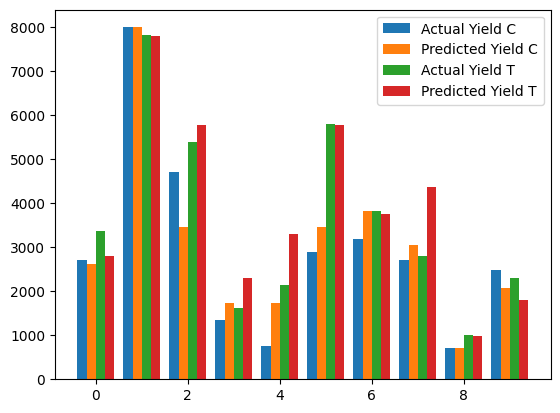

In [21]:
plt.bar(np.arange(10)-0.3, comparison[:10, 0], 0.2, label="Actual Yield C")
plt.bar(np.arange(10)-0.1, comparison[:10, 2], 0.2, label="Predicted Yield C")
plt.bar(np.arange(10)+0.1, comparison[:10, 1], 0.2, label="Actual Yield T")
plt.bar(np.arange(10)+0.3, comparison[:10, 3], 0.2, label="Predicted Yield T")

plt.legend()
plt.show()

In [22]:
mse_yield_c = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_yield_t = mean_squared_error(y_test[:, 1], y_pred[:, 1])

overall_mse = (mse_yield_c + mse_yield_t) / 2 

print(f"Yield_C - MSE: {mse_yield_c}")
print(f"Yield_T - MSE: {mse_yield_t}")
print(f"Overall MSE: {overall_mse}")

Yield_C - MSE: 23307939.30044888
Yield_T - MSE: 22488064.317522146
Overall MSE: 22898001.808985513


In [23]:
r2_yield_c = r2_score(y_test[:, 0], y_pred[:, 0])
r2_yield_t = r2_score(y_test[:, 1], y_pred[:, 1])

overall_r2 = (r2_yield_c + r2_yield_t) / 2

print(f"Yield_C - R2: {r2_yield_c}")
print(f"Yield_T - R2: {r2_yield_t}")
print(f"Overall R2: {overall_r2}")

Yield_C - R2: 0.7944511528033638
Yield_T - R2: 0.8076220720732793
Overall R2: 0.8010366124383215


In [24]:
import joblib

joblib.dump(multi_output_regressor, "model.jbl.lzma")

['model.jbl.lzma']

In [25]:
joblib.dump(label_encoder, "labelEncoder.jbl.lzma")
joblib.dump(ct, "columnTransformer.jbl.lzma")

['columnTransformer.jbl.lzma']

In [26]:
df.iloc[1, 3:-2].values

array([3.5, 1130.8186832740214, 26, 15, 56.90510318949343,
       20.638836772983115, 4, 6.039655462184873, 159, 16, 5, 9, 1, 8],
      dtype=object)

In [61]:
X_test[0].reshape(1, -1)

array([[181.0, 1130.8186832740214, 11, 9, 56.90510318949343,
        20.638836772983115, 9, 6.039655462184873, 151, 16, 12, 1, 1, 13]],
      dtype=object)

In [27]:
df.iloc[:, 5].unique()

array([26, 3, 11, 15, 25, 19, 6, 5, 2, 0, 14, 23, 16, 1, 4, 24, 13, 18,
       10, 7, 8, 9, 22, 21, 12, 17, 20], dtype=object)

In [39]:
label_encoder.classes_

array(['0 Mg per ha manure', 'Bare', 'Bare fallow', 'CK',
       'Continous maize', 'Continous monoculture maize',
       'Continuous maize', 'Continuous maize without fertilizer',
       'Fallow', 'Monoculture maize without fertilizer', 'Natural bush',
       'Natural fallow', 'Natural grass', 'No cover crop', 'No woodlot',
       'Sorghum (SRP)', 'Sorghum (SSP)', 'Summer fallow',
       'Traditional fallow', 'Unferlilized maize'], dtype=object)

In [38]:
df['samplingthickness'].unique()

array(['Not_available', '15', '30', '7.5', '20', '18', '120', '5', '10',
       '150', '45', '28', '23.5', '25', '60', '40'], dtype=object)